Let's get a list of all of our MPs first

In [43]:
import requests
import json

#Dewan Rakyat MP Posts in Sinar Malaysia Popit Database
posts = []
for page in range(1,10):
    dewan_rakyat_request = requests.get('http://sinar-malaysia.popit.mysociety.org/api/v0.1/search/posts?q=organization_id:53633b5a19ee29270d8a9ecf'+'&page='+str(page))
    for post in (json.loads(dewan_rakyat_request.content)['result']):
        posts.append(post)
        
#FIXME There was redelineation done in 2005 for Sarawak, in which a few old ids were reused with
# different names and 3 more seats were added. A check will need to be done for expired posts
# when these older posts are added.



Now we will load up information on the MPs holding these posts

In [44]:
import datetime
from dateutil import parser

MP_ids = []

current = datetime.datetime(2013,5,5)

#Current MPs should not have any end dates
for post in posts:
    #db not always clean, making sure either no end_date or empty value
    for member in post['memberships']:
        if parser.parse(member['start_date']) > current :
            if member.has_key('end_date'):
                if member['end_date'] == '':
                    MP_ids.append(member['person_id'])
            if not member.has_key('end_date'):
                MP_ids.append(member['person_id'])
                
print len(MP_ids)
        
#There are some bad data during automated import from GE13 results.
#This will be cleaned up in a few weeks, but we check for duplicates just in case.
#There should only ever be 1 person holding 1 post at a moment in time.

def uniq(seq):
    #http://www.peterbe.com/plog/uniqifiers-benchmark
    seen = set()
    seen_add = seen.add
    return [ x for x in seq if not (x in seen or seen_add(x))]

def person(person_id):
    #Load up information of persons from Popit database
    req = requests.get('https://sinar-malaysia.popit.mysociety.org/api/v0.1/persons/' + person_id)
    return json.loads(req.content)['result']


def age(str):
    #calculate age based on date strings stored in Popit
    born = parser.parse(str)
    today = datetime.date.today()
    age = today.year - born.year - ((today.month, today.day) < (born.month, born.day)) 
    return int(age)

#FIXME Currently returning 309, it should be 222

304


In [45]:
#Pull down the data of current MPs from Popit Database
MPs = []
for id in MP_ids:
    person_data = person(id)
    if person_data.has_key('birth_date'):
        if person_data['birth_date']:
            #add current age in addition to the values in Popit
            person_data['age'] = age(person_data['birth_date'])
            MPs.append(person_data)

Fun with data!

In [46]:
WomenMPs = []
for MP in MPs:
    if MP.has_key('gender') and MP['gender'] == 'Female':
        WomenMPs.append(MP)

print len(WomenMPs)

###

21


In [47]:
import numpy

#list of ages
ages = []
for i in MPs:
    ages.append(int(i['age']))
    
print numpy.median(ages)
print numpy.max(ages)
print numpy.min(ages)


56.0
74
32


Pandas
=====

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

If you're learning Python to work with data, it's worth getting used to this library, as it provides pretty much all you will need when working with data from importing and cleaning messy data, to exporting it, including working with very large data sets.

A lot of the earlier work, such as cleaning, getting unique values etc. could be done easily with built-in functions of pandas as a DataFrame.

In [48]:
import pandas

pandas.DataFrame(MPs)

,age,birth_date,contact_details,death_date,dissolution_date,end_date,founding_date,gender,html_url,id,...,initials,links,memberships,name,other_names,proxy_image,sources,start_date,summary,url
0,39,1975-09-12,"[{u'type': u'phone', u'id': u'558337eef3c3651a...",NaN,NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e48755222837c2c0596a7,...,NaN,"[{u'url': u'http://ongkianming.com', u'note': ...","[{u'contact_details': [], u'links': [], u'end_...",Ong Kian Ming,"[{u'name': u'王建民', u'id': u'558337eef3c3651a49...",https://sinar-malaysia.popit.mysociety.org/ima...,"[{u'url': u'http://ongkianming.com', u'note': ...",NaN,Dr. Ong Kian Ming was elected as a first-time ...,https://sinar-malaysia.popit.mysociety.org/api...
1,54,1960-11-01,"[{u'type': u'phone number', u'id': u'5590d64dd...",NaN,NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e46ee5222837c2c0592eb,...,NaN,"[{u'url': u'http://charlessantiago.org/', u'no...","[{u'contact_details': [], u'links': [], u'end_...",Charles Anthony A/L R. Santiago,"[{u'name': u'Charles Santiago', u'id': u'55918...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/api...
2,46,1968-12-18,"[{u'type': u'email', u'id': u'55b351e0f1faa736...",NaN,NaN,NaN,NaN,Male,https://sinar-malaysia.popit.mysociety.org/per...,53635149f1eab6270da6c8f6,...,NaN,[{u'url': u'https://en.wikipedia.org/wiki/Wong...,"[{u'area_id': None, u'contact_details': [], u'...",Wong Chen,"[{u'name': u'Wong Chen X', u'id': u'55b351e0f1...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Wong Chen is a Malaysian politician and is the...,https://sinar-malaysia.popit.mysociety.org/api...
3,55,1959-10-04,"[{u'type': u'address', u'id': u'55b6017353d566...",NaN,NaN,NaN,NaN,Female,https://sinar-malaysia.popit.mysociety.org/per...,545e43f15222837c2c058b76,...,NaN,"[{u'url': u'http://dtknorah.blogspot.com/', u'...","[{u'contact_details': [], u'links': [], u'end_...",Norah Abdul Rahman,"[{u'note': u'With honorifics', u'name': u'Datu...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Datuk Hajjah Norah Abdul Rahman (born 4 Octobe...,https://sinar-malaysia.popit.mysociety.org/api...
4,57,1958-03-14,"[{u'type': u'phone number', u'id': u'55b5fca10...",NaN,NaN,NaN,NaN,Female,https://sinar-malaysia.popit.mysociety.org/per...,545e46125222837c2c0590c5,...,NaN,"[{u'url': u'https://twitter.com/ybz99', u'note...","[{u'contact_details': [], u'links': [], u'url'...",Zuraida Kamaruddin,"[{u'name': u'Zuraida Binti Kamaruddin', u'id':...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/api...
5,37,1977-09-14,"[{u'type': u'handphone number', u'id': u'5582d...",NaN,NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e429d5222837c2c058829,...,NaN,[{u'url': u'https://ms-my.facebook.com/rafizir...,"[{u'contact_details': [], u'links': [], u'end_...",Mohd Rafizi Bin Ramli,[],https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/api...
6,57,1958-03-14,"[{u'type': u'phone number', u'id': u'55b5fca10...",NaN,NaN,NaN,NaN,Female,https://sinar-malaysia.popit.mysociety.org/per...,545e46125222837c2c0590c5,...,NaN,"[{u'url': u'https://twitter.com/ybz99', u'note...","[{u'contact_details': [], u'links': [], u'url'...",Zuraida Kamaruddin,"[{u'name': u'Zuraida Binti Kamaruddin', u'id':...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/api...
7,64,1951-07-16,"[{u'type': u'facebook', u'id': u'5582d9c500912...",NaN,NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e45785222837c2c058f42,...,NaN,[{u'url': u'https://en.wikipedia.org/wiki/Che_...,"[{u'contact_details': [], u'links': [], u'end_...",Che Rosli Bin Che Mat,"[{u'name': u'Dr. Che Rosli Che Mat', u'id': u'...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/api.

In [49]:
df = pandas.DataFrame(MPs)


print df['age'].median()
print df['age'].max()
print df['age'].min()

56.0
74
32


We could have dropped duplicates from bad data: 

df.drop_duplicates('id')

Parse and set birth_date column as datetime to calculate age without parsing it manually:

df['birth_date']= pandas.to_datetime(df['birth_date'])

Best of all after cleaning up the data, we can easily export it to CSV format where it is more easily usable by normal users in spreadsheets or plotting charts.

In [50]:
MP_source = {'name':df['name'],'birth_date':df['birth_date'],'age':df['age']}

In [51]:
MP_Names = pandas.DataFrame(MP_source)

MP_Names.sort('age')

,age,birth_date,name
137,32,1982-10-17,Zairil Khir Johari
136,32,1982-10-17,Zairil Khir Johari
121,33,1982-05-13,Sim Chee Keong
122,33,1982-05-13,Sim Chee Keong
54,34,1981-01-27,Teo Nie Ching
19,34,1980-11-19,Nurul Izzah Anwar
124,35,1979-08-09,Kasthuriraani Patto
123,35,1979-08-09,Kasthuriraani Patto
39,37,1977-11-27,Liew Chin Tong
5,37,1977-09-14,Mohd Rafizi Bin Ramli


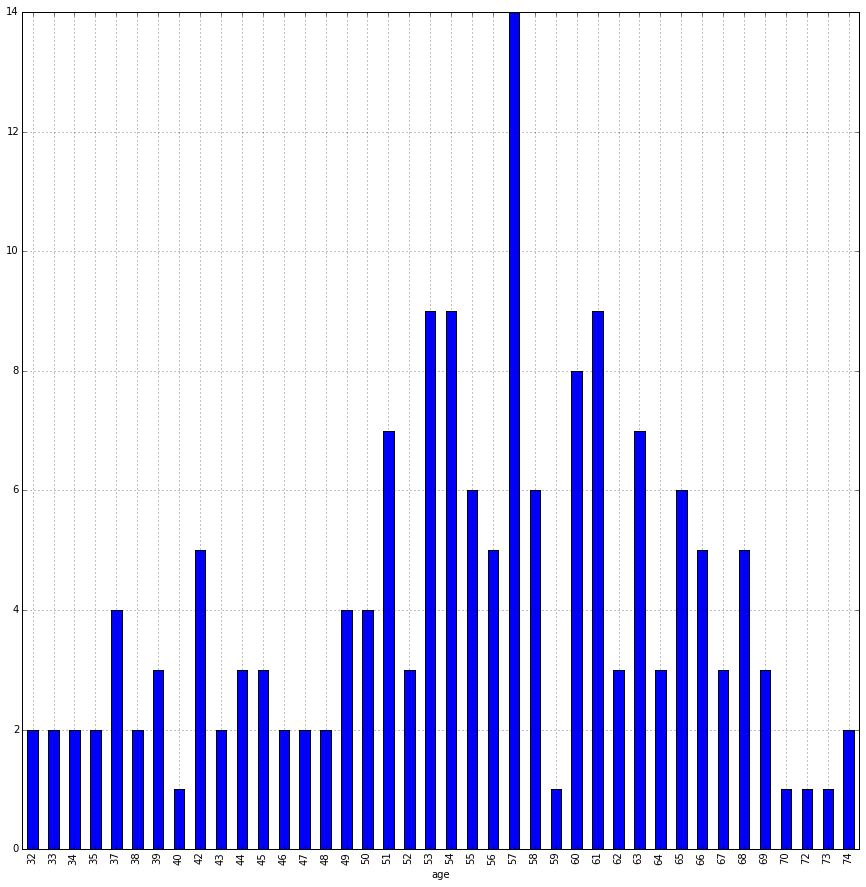

In [52]:
%matplotlib inline 
grouped = MP_Names.groupby('age')
grouped.age.count().plot(kind='bar',figsize=(15,15))

Previous example tried to massage python data structures into Pandas DataFrame which works, but isn't very pretty.

Ng Swee Meng <sweester@sinarproject.org> has contributed proper way of building up data structures for Pandas DataFrames in the following example:

In [53]:
import pandas
data = { "age": [], "birth_date": []}
data_index = { "age": [], "birth_date": []}
for entry in MPs:
    data["age"].append(entry["age"])
    data_index["age"].append(entry["name"])
    data["birth_date"].append(entry["birth_date"])
    data_index["birth_date"].append(entry["name"])

final_data = { "age": pandas.Series(data["age"], index=data_index["age"]),
                "birth_date": pandas.Series(data["birth_date"], index=data_index["birth_date"])
             }
mp_age_df = pandas.DataFrame(final_data)
mp_age_df.sort("age")
    

,age,birth_date
Zairil Khir Johari,32,1982-10-17
Zairil Khir Johari,32,1982-10-17
Sim Chee Keong,33,1982-05-13
Sim Chee Keong,33,1982-05-13
Teo Nie Ching,34,1981-01-27
Nurul Izzah Anwar,34,1980-11-19
Kasthuriraani Patto,35,1979-08-09
Kasthuriraani Patto,35,1979-08-09
Liew Chin Tong,37,1977-11-27
Mohd Rafizi Bin Ramli,37,1977-09-14


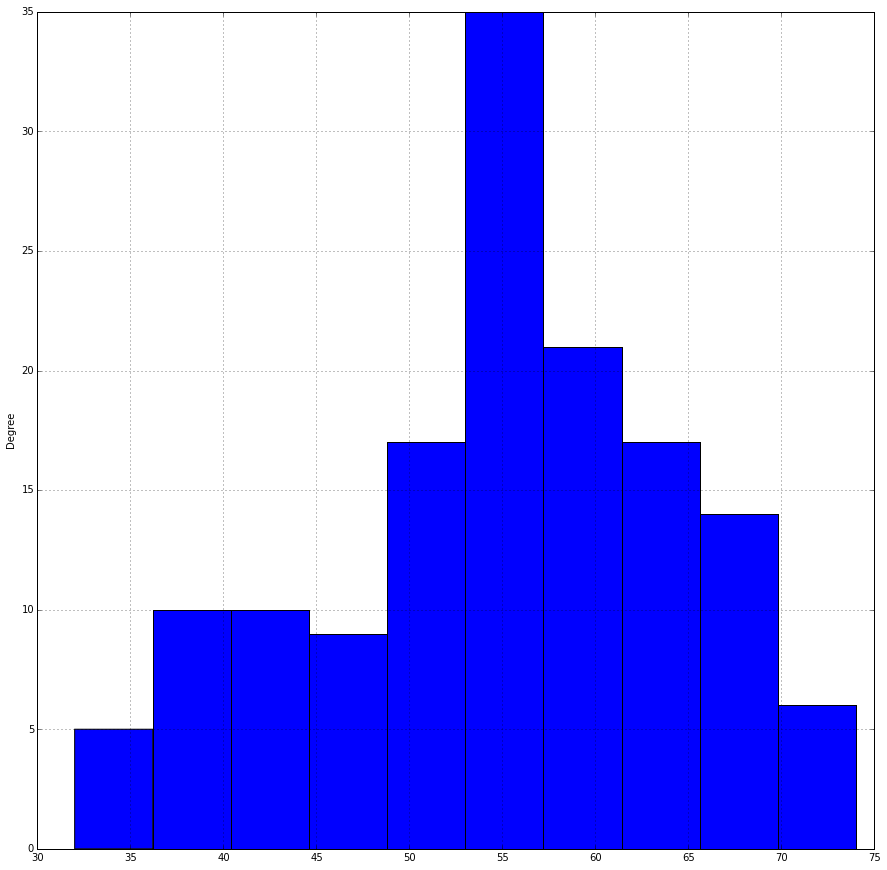

In [157]:
mp_age_df["age"].plot(kind="hist",figsize=(15,15))

17